## Convergence of Binomial to Poisson
*Version 2023*

In lectures, we saw that the Poisson distribution is continuous distribution and a limiting form of the Binomial distribution, with $p\rightarrow 0$ and $n\rightarrow\infty$.

We can write the Poisson as...
$$f_\mu(r) = \frac{\mu^r}{r!} e^{-\mu}$$
In a Poisson distribution, the mean µ and the variance  σ²  are the same.

In fact even for moderately large $n$ and small $p$ the result will be pretty close to Poisson, which means that the Poisson distribution is a good one to use in quite a large range of circumstances. We can play with this convergence by taking a fixed value of $\mu$ and varying $n$ and $p$ in complementary fashion. 

First the setup we will need:

In [19]:
from math import *  # basic maths routines
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, output_notebook, show
output_notebook()  # plot inside the notebook

Loading BokehJS ...

First, **set the parameters**. We will pick a value of the mean $\mu$ which will apply to both the Binomial and Poisson distributions. Then we pick a value of $n$ for the Binomial, and then fix $p$ so that we match the fixed $\mu$.

In [22]:
# set parameters
mu=4.2 # choose mu and leave this fixed
n=20  # choose a value of n
p=mu/float(n) # get p needed to keep mu fixed

Next we generate the Binomial and Poisson distributions $f_n(r)$ and $f_\mu(r)$, given the value of $p$.. Note that the Poisson version could go on to indefinitely large values of $r$ so we have to pick a maximum $r_{max}$. 

In [40]:
rmax=int(3.*mu)

# initialise plot arrays
x=np.arange(0,rmax+1)
yb=np.zeros(len(x))  # to hold binomial results
yp=np.zeros(len(x)) # to hold poisson results
# array for plotting Gaussian
step=0.1  # step size for x-grid
xg=np.arange(0.0,float(rmax+2),step)  

yg=np.zeros(len(xg)) # to hold gaussian results
for i in range(0,len(xg)):
    yg[i]=stats.norm.pdf(xg[i],mu,sqrt(mu))

# make results
for i in range(0,rmax+1):
    yb[i]=stats.binom.pmf(i,n,p)
    yp[i]=stats.poisson.pmf(i,mu)
#    yg[i]=stats.norm.pdf(i,mu,sqrt(mu))
    

So.. pick a value of $\mu$, then try gradually larger values of $n$, watching the binomial gradually approach the Poisson shape.

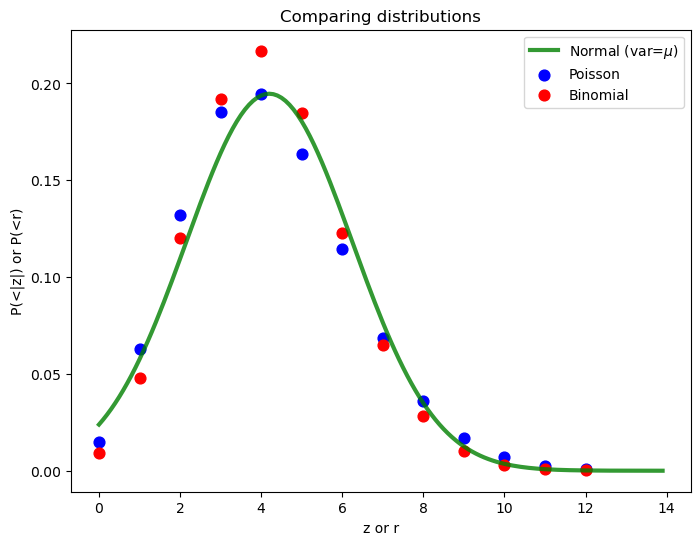

In [50]:


# Plot the distributions using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Poisson distribution and associated Gaussian  Alpha blends colours


ax.plot(xg, yg, linewidth=3, label="Normal (var=$\mu$)", alpha=0.8, color="green")

ax.scatter(x, yp, c="blue", label="Poisson", alpha=1, s=60)

# Plot Binomial distribution
ax.scatter(x, yb, c="red", label="Binomial", alpha=1, s=60)

# Set labels and title
ax.set_xlabel('z or r')
ax.set_ylabel('P(<|z|) or P(<r)')
ax.set_title('Comparing distributions')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()
